In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data = pd.read_csv("/content/data (1).csv")

In [3]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year

In [4]:
data = data[['sqft_living', 'bedrooms', 'city', 'price']]

In [5]:
 #Convert 'city' to dummy variables
data = pd.get_dummies(data, columns=['city'], drop_first=True)

In [6]:
X = data.drop('price', axis=1)
y = data['price']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
linear_model = LinearRegression()
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
decision_tree = DecisionTreeRegressor(random_state=42)
gradient_boosting = GradientBoostingRegressor(random_state=42)

In [9]:
linear_model.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [10]:
y_pred_linear = linear_model.predict(X_test)
y_pred_rf = random_forest.predict(X_test)
y_pred_dt = decision_tree.predict(X_test)
y_pred_gb = gradient_boosting.predict(X_test)

In [11]:
def evaluate_model(name, y_test, y_pred):
    print(f"Model: {name}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
    print(f"R-Squared: {r2_score(y_test, y_pred)}")
    print("-" * 40)

In [12]:
evaluate_model("Linear Regression", y_test, y_pred_linear)

Model: Linear Regression
Mean Absolute Error: 179991.32228432377
Mean Squared Error: 980556425248.2292
R-Squared: 0.038525328075772136
----------------------------------------


In [13]:
evaluate_model("Random Forest Regression", y_test, y_pred_rf)

Model: Random Forest Regression
Mean Absolute Error: 190757.61683213865
Mean Squared Error: 985951132679.1735
R-Squared: 0.033235602340732195
----------------------------------------


In [14]:
evaluate_model("Decision Tree Regression", y_test, y_pred_dt)

Model: Decision Tree Regression
Mean Absolute Error: 219623.86339336433
Mean Squared Error: 1034117138195.79
R-Squared: -0.013993086554214385
----------------------------------------


In [15]:
evaluate_model("Gradient Boosting Regressor", y_test, y_pred_gb)

Model: Gradient Boosting Regressor
Mean Absolute Error: 177143.27318231078
Mean Squared Error: 987941110549.3837
R-Squared: 0.03128434969414173
----------------------------------------


In [16]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation for each model and print average scores
models = {
    "Linear Regression": linear_model,
    "Random Forest": random_forest,
    "Decision Tree": decision_tree,
    "Gradient Boosting": gradient_boosting
}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f"{name} - Average R^2 Score from Cross-Validation: {scores.mean():.3f}")


Linear Regression - Average R^2 Score from Cross-Validation: 0.532
Random Forest - Average R^2 Score from Cross-Validation: 0.333
Decision Tree - Average R^2 Score from Cross-Validation: -0.083
Gradient Boosting - Average R^2 Score from Cross-Validation: 0.460


In [21]:
predictions = {
    "Actual Price": y_test,
    "Linear Regression Prediction": y_pred_linear,
    "Random Forest Prediction": y_pred_rf,
    "Decision Tree Prediction": y_pred_dt,
    "Gradient Boosting Prediction": y_pred_gb
}
predictions_df = pd.DataFrame(predictions)
print(predictions_df.head())

      Actual Price  Linear Regression Prediction  Random Forest Prediction  \
3683      544000.0                 474252.494075              3.430347e+05   
4411           0.0                 268251.678802              2.733338e+05   
2584     1712500.0                 891913.643295              1.053455e+06   
69        365000.0                 427718.738318              3.531523e+05   
1844      275000.0                 217503.007265              2.801297e+05   

      Decision Tree Prediction  Gradient Boosting Prediction  
3683              3.492187e+05                 458865.496268  
4411              4.150000e+05                 316899.432292  
2584              1.070000e+06                 925103.888006  
69                3.499000e+05                 398351.639169  
1844              2.823780e+05                 281482.918761  


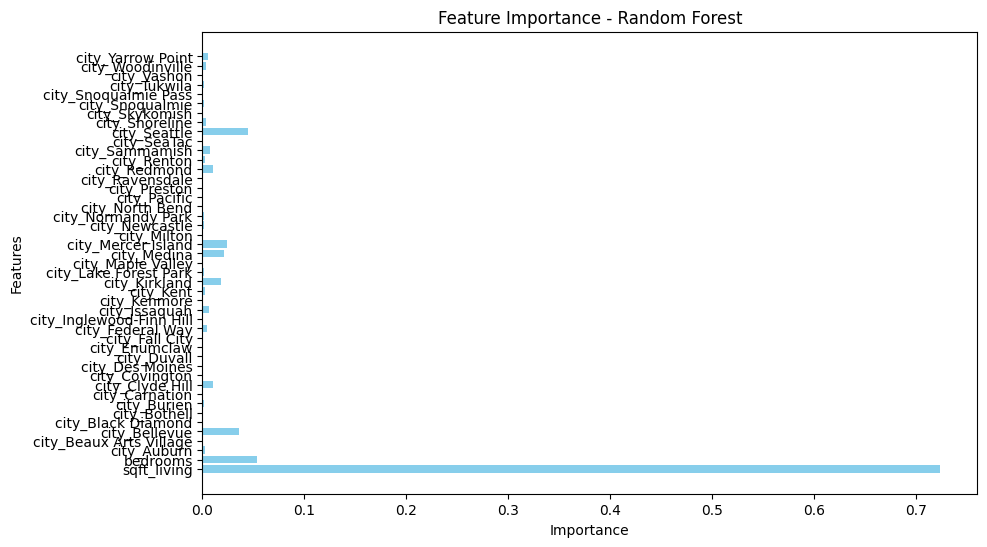

In [17]:
import matplotlib.pyplot as plt

# Extract and plot feature importances from Random Forest
feature_importances_rf = random_forest.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances_rf, color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance - Random Forest")
plt.show()

In [18]:
from sklearn.model_selection import GridSearchCV
# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
# Initialize GridSearchCV with Random Forest
grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid_rf, cv=5, scoring='r2', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
# Print the best parameters and score
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best R^2 Score from Grid Search:", grid_search_rf.best_score_)

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 150}
Best R^2 Score from Grid Search: 0.5810558514070714


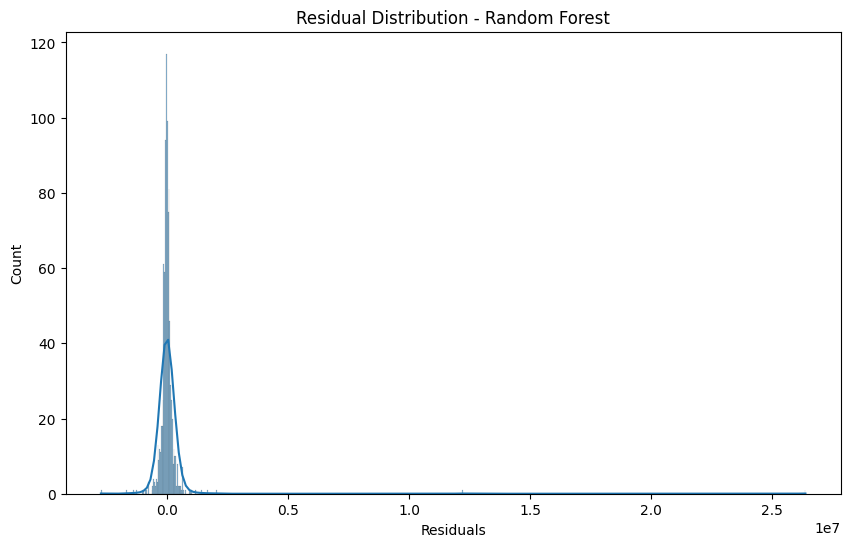

In [19]:
import seaborn as sns
# Calculate residuals
residuals = y_test - y_pred_rf  # Replace with the model you want to analyze
# Plot residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Residual Distribution - Random Forest")
plt.show()

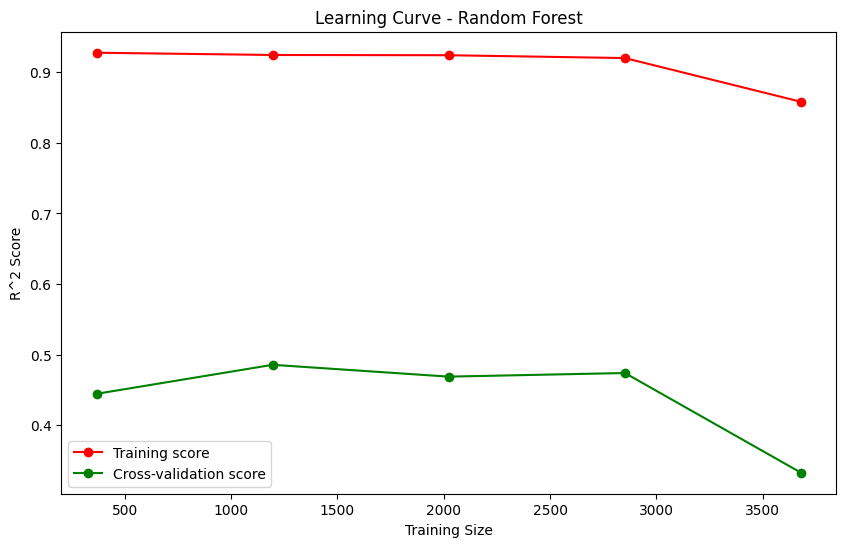

In [20]:
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes, train_scores, test_scores = learning_curve(random_forest, X, y, cv=5, scoring='r2',
                                                        train_sizes=np.linspace(0.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training Size")
plt.ylabel("R^2 Score")
plt.title("Learning Curve - Random Forest")
plt.legend(loc="best")
plt.show()